# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tjmcd\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('news_api')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(q='bitcoin+Bitcoin+BTC', language='en')

In [5]:
# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(q='ethereum+Ethereum+ETH', language='en')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_articles = []
for article in btc_news['articles']:
    try:
        sentiment = sid.polarity_scores(article['description'])
        text = article['content']
        
        btc_articles.append({
            'compound': sentiment['compound'],
            'negative': sentiment['neg'],
            'neutral':sentiment['neu'],
            'positive':sentiment['pos'],
            'text':text})
        btc_df = pd.DataFrame(btc_articles)
    except AttributeError:
        pass

btc_df.head()

,compound,negative,neutral,positive,text
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December..."
2,-0.3400,0.094,0.906,0.000,"In September, the SkyBridge Alternatives (SALT..."
3,0.3818,0.149,0.652,0.199,"There over 7,900 cryptocurrencies today, and t..."
4,0.0000,0.000,1.000,0.000,That's good! But it won't protect you if a thi...


In [7]:
# Create the Ethereum sentiment scores DataFrame
eth_articles = []
for article in eth_news['articles']:
    try:
        sentiment = sid.polarity_scores(article['description'])
        text = article['content']
        
        eth_articles.append({
            'compound': sentiment['compound'],
            'negative': sentiment['neg'],
            'neutral':sentiment['neu'],
            'positive':sentiment['pos'],
            'text':text})
        eth_df = pd.DataFrame(eth_articles)
    except AttributeError:
        pass

eth_df.head()

,compound,negative,neutral,positive,text
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December..."
2,0.7351,0.000,0.813,0.187,Ethereum has been on a tear this year. Its out...
3,0.0000,0.000,1.000,0.000,Amid the news of Bitcoin's price plunge on Sat...
4,-0.6124,0.312,0.688,0.000,A highly in-demand non-fungible token (NFT) wa...


In [8]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.00000,20.000000
mean,0.073290,0.058150,0.86610,0.075750
std,0.361373,0.092713,0.11870,0.079844
min,-0.624900,0.000000,0.55200,0.000000
25%,-0.151025,0.000000,0.84050,0.000000
50%,0.038600,0.000000,0.87550,0.070500
75%,0.350450,0.107750,0.94175,0.138500
max,0.670500,0.278000,1.00000,0.234000


In [9]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.00000,20.000000,20.00000
mean,0.191170,0.04750,0.844500,0.10800
std,0.416695,0.08588,0.127466,0.10873
min,-0.612400,0.00000,0.552000,0.00000
25%,-0.083575,0.00000,0.743000,0.00000
50%,0.038600,0.00000,0.864500,0.08200
75%,0.601275,0.06525,0.938000,0.19875
max,0.771700,0.31200,1.000000,0.29600


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Bitcoin

Q. Which coin had the highest positive score?

A: Ethereum

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw_add_ons = {'ha', 'the','chars','char'}

In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
    lem2 = [lemmatizer.lemmatize(word, pos='v') for word in lem]
    lem3 = [lemmatizer.lemmatize(word, pos='n') for word in lem2]
    lem4 = [lemmatizer.lemmatize(word, pos='a') for word in lem3]
    
    # Convert the words to lowercase & Remove Stopwords
    output = [word.lower() for word in lem4 if word.lower() not in sw.union(sw_add_ons)]
    
    return output

In [13]:
# Create a new tokens column for Bitcoin
btc_token = []
for i in range (0, len(btc_df.index)):
    btc_func = tokenizer(btc_df['text'][i])
    btc_token.append(btc_func)

btc_df['tokenized'] = btc_token
btc_df.head()

,compound,negative,neutral,positive,text,tokenized
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, release, pair, relati..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December...","[available, price, december, ththe, ear, earbu..."
2,-0.3400,0.094,0.906,0.000,"In September, the SkyBridge Alternatives (SALT...","[september, skybridge, alternatives, salt, con..."
3,0.3818,0.149,0.652,0.199,"There over 7,900 cryptocurrencies today, and t...","[cryptocurrenciestoday, digital, asset, collec..."
4,0.0000,0.000,1.000,0.000,That's good! But it won't protect you if a thi...,"[thats, good, wont, protect, thief, snatchandr..."


In [14]:
# Create a new tokens column for Ethereum
eth_token = []
for i in range (0, len(eth_df.index)):
    eth_func = tokenizer(eth_df['text'][i])
    eth_token.append(eth_func)

eth_df['tokenized'] = eth_token
eth_df.head()

,compound,negative,neutral,positive,text,tokenized
0,0.5106,0.000,0.920,0.080,"Earlier this year, Nothing released a pair of ...","[earlier, year, nothing, release, pair, relati..."
1,0.3182,0.000,0.916,0.084,"Available for the same price, $99, on December...","[available, price, december, ththe, ear, earbu..."
2,0.7351,0.000,0.813,0.187,Ethereum has been on a tear this year. Its out...,"[ethereum, tear, year, outperform, bitcoin, ye..."
3,0.0000,0.000,1.000,0.000,Amid the news of Bitcoin's price plunge on Sat...,"[amid, news, bitcoins, price, plungeon, saturd..."
4,-0.6124,0.312,0.688,0.000,A highly in-demand non-fungible token (NFT) wa...,"[highly, indemand, nonfungible, token, nft, wa..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams

In [16]:
# Generate the Bitcoin N-grams where N=2
btc_big_string = [' '.join(item) for item in btc_df['tokenized']]
btc_string_toke = tokenizer(str(btc_big_string))
btc_bigrams = ngrams(btc_string_toke, n=2)
btc_freq = Counter(btc_bigrams).most_common(10)
btc_freq

[(('ear', 'earbuds'), 4),
 (('penny', 'stock'), 3),
 (('early', 'year'), 2),
 (('new', 'era'), 2),
 (('high', 'volume'), 2),
 (('stock', 'buy'), 2),
 (('year', 'nothing'), 1),
 (('nothing', 'release'), 1),
 (('release', 'pair'), 1),
 (('pair', 'relatively'), 1)]

In [17]:
# Generate the Ethereum N-grams where N=2
eth_big_string = [' '.join(item) for item in eth_df['tokenized']]
eth_string_toke = tokenizer(str(eth_big_string))
eth_bigrams = ngrams(eth_string_toke, n=2)
eth_freq = Counter(eth_bigrams).most_common(10)
eth_freq

[(('ear', 'earbuds'), 4),
 (('early', 'year'), 2),
 (('crypto', 'investor'), 2),
 (('vitalik', 'buterin'), 2),
 (('decentralize', 'finance'), 2),
 (('one', 'popular'), 2),
 (('year', 'nothing'), 1),
 (('nothing', 'release'), 1),
 (('release', 'pair'), 1),
 (('pair', 'relatively'), 1)]

In [18]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    string = ' '.join(tokens)
    tokenized = tokenizer(string)
    return Counter(tokens).most_common(10)

In [19]:
# Use token_count to get the top 10 words for Bitcoin
token_count(btc_string_toke,N=3)

[('cryptocurrency', 5),
 ('stock', 5),
 ('ear', 4),
 ('earbuds', 4),
 ('bitcoin', 4),
 ('crypto', 4),
 ('account', 4),
 ('make', 4),
 ('im', 4),
 ('volume', 4)]

In [20]:
# Use token_count to get the top 10 words for Ethereum
token_count(eth_string_toke,N=3)

[('ethereum', 7),
 ('crypto', 6),
 ('year', 4),
 ('ear', 4),
 ('earbuds', 4),
 ('million', 4),
 ('cryptocurrency', 4),
 ('decentralize', 4),
 ('mine', 4),
 ('nothing', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

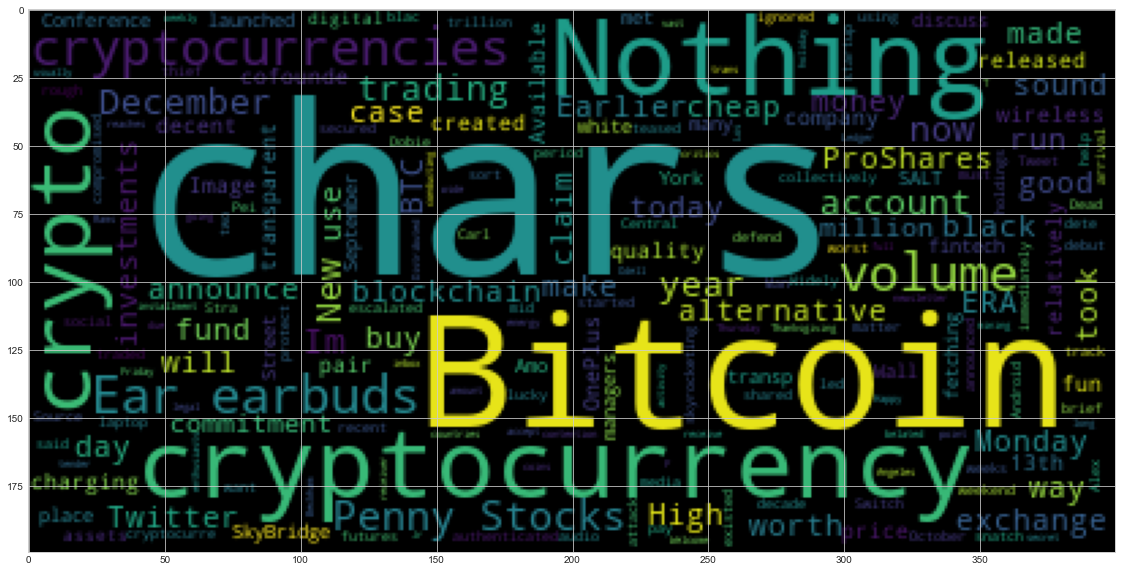

In [22]:
# Generate the Bitcoin word cloud
btc_cloud_string = ' '.join(btc_df['text'])
btc_wc = WordCloud().generate(btc_cloud_string)
plt.imshow(btc_wc)

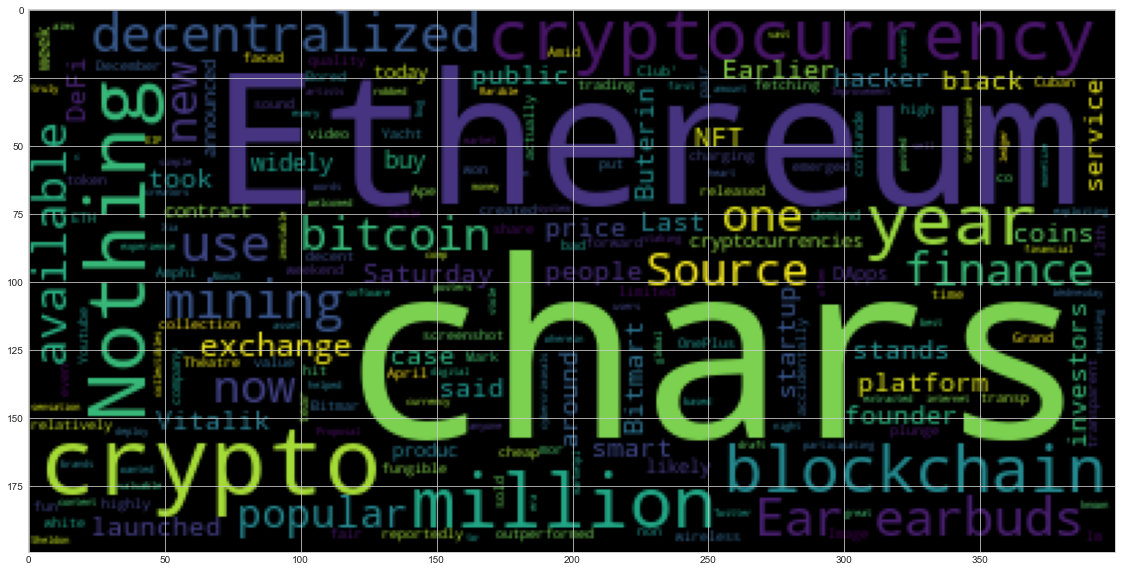

In [35]:
# Generate the Ethereum word cloud
eth_cloud_string = ' '.join(eth_df['text'])
eth_wc = WordCloud().generate(eth_cloud_string)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [36]:
import spacy
from spacy import displacy

In [37]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [38]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
btc_cloud_string

"Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] Available for the same price, $99, on December 13th\r\nThe Ear 1 earbuds and case, now in black.\r\nImage: Nothing\r\nNothings Ear 1 earbuds, which launched earlier this year in a fetching white and transp… [+1865 chars] In September, the SkyBridge Alternatives (SALT) Conference took place in New York, where many Wall Street fund managers met to discuss Bitcoin (CRYPTO: BTC), fintech, and alternative investments. Amo… [+226 chars] There over 7,900\xa0cryptocurrencies\xa0today, and those digital assets are collectively worth $2.7 trillion, skyrocketing over 1,200% since December 2019. To help you get started, here are two cryptocurre… [+164 chars] That's good! But it won't protect you if a thief snatch-and-runs with your laptop after you've authenticated.\r\nThe only way to 

In [42]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_cloud_string)

# Add a title to the document
btc_ner.user_data['title'] = 'BTC NER'

In [43]:
# Render the visualization
displacy.render(btc_ner, style = 'ent')

In [44]:
# List all Entities
btc_ent_list = [btc_ner.ents]
btc_ent_list

[(Earlier this year,
  99,
  OnePlus,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  September,
  the SkyBridge Alternatives,
  New York,
  Bitcoin,
  today,
  $2.7 trillion,
  over 1,200%,
  December 2019,
  two,
  Twitter,
  Tweet,
  +709,
  ProShares,
  Monday,
  its worst day,
  mid-October,
  a rough weekend,
  The ProShares Bitcoin Stra,
  Alex Dobie,
  Android Central,
  Carl Pei-,
  Nothing,
  today,
  1,
  recent weeks,
  Cryptocurrencies,
  over a decade,
  Thanksgiving,
  Distributed Ledger,
  weekly,
  Thursday,
  Friday,
  Odell Beckham Jr.,
  Twitter,
  Monday,
  Bitcoin,
  NEW ERA &,
  Worth Buying,
  December,
  2018,
  Pennies,
  700 million,
  this year,
  800 million,
  2,
  El Salvador,
  first,
  Bitcoin City,
  Nayib Bukele,
  +3000,
  2021,
  over $43 billion,
  2021)]

---

### Ethereum NER

In [45]:
# Concatenate all of the Ethereum text together
eth_cloud_string

'Earlier this year, Nothing released a pair of relatively cheap $99 Ear 1 earbuds with a fun transparent case, wireless charging and decent sound quality. Now, the company (created by OnePlus cofounde… [+1395 chars] Available for the same price, $99, on December 13th\r\nThe Ear 1 earbuds and case, now in black.\r\nImage: Nothing\r\nNothings Ear 1 earbuds, which launched earlier this year in a fetching white and transp… [+1865 chars] Ethereum has been on a tear this year. Its outperformed bitcoin this year and has hit an all-time high. Ethereum has even won over people like Mark Cuban.\r\nI have my fair share of bitcoin, but Im mor… [+10978 chars] Amid the news of Bitcoin\'s price plunge\xa0on Saturday, crypto investors are faced with more bad news.\xa0Over the weekend, a hacker reportedly took $196 million from cryptocurrency trading platform Bitmar… [+1445 chars] A highly in-demand non-fungible token (NFT) was accidentally sold for $ 3,000 when its value was actually around $ 300,000.

In [46]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_cloud_string)

# Add a title to the document
eth_ner.user_data['title'] = 'ETH NER'

In [48]:
# Render the visualization
displacy.render(eth_ner, style = 'ent')

In [49]:
# List all Entities
eth_ent_list = [eth_ner.ents]
eth_ent_list

[(Earlier this year,
  99,
  OnePlus,
  99,
  December 13th,
  The Ear 1,
  Nothings Ear 1,
  earlier this year,
  this year,
  this year,
  Mark Cuban,
  Bitcoin,
  Saturday,
  the weekend,
  $196 million,
  Bitmar,
  NFT,
  3,000,
  around $ 300,000,
  April 2021,
  Youtube/Grand Amphi Théatre,
  Ethereum,
  ETH,
  Vitalik Buterin,
  Ethereum Improvement Proposal,
  EIP,
  7,
  7,
  Blockchain,
  Wednesday,
  $31 million,
  DeFi,
  Ethereum,
  DeFi,
  Last night,
  one,
  around $ 200 million,
  Sheldon Xia,
  Twitter,
  Ethereum,
  NFT,
  the U.S. Constitution,
  last week,
  today,
  roughly half,
  Alex Dobie,
  Android Central,
  Carl Pei-,
  Nothing,
  today,
  1,
  recent weeks,
  Flexpool,
  BitMart,
  late Saturday,
  $150 million,
  PeckShield,
  Cryptocurrencies,
  over a decade,
  Solana,
  DApps,
  DApps)]

---